##**LEVEL 1---TASK1 (Restaurant Dataset)**

## **1.Load Data and Check Shape** ##

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# --- This part handles the file upload in Colab ---
print("Please upload your 'Dataset .csv' file:")
uploaded = files.upload()

# Get the file name you just uploaded
file_name = list(uploaded.keys())[0]
print(f"\nSuccessfully uploaded {file_name}")

# --- Task 1: Load the dataset and explore rows/columns ---
df = pd.read_csv(file_name)
print(f"\nThe dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Please upload your 'Dataset .csv' file:


Saving Dataset .csv to Dataset .csv

Successfully uploaded Dataset .csv

The dataset has 9551 rows and 21 columns.


##**2: Check and Handle Missing Values**

In [2]:
# --- Task 2: Check for missing values ---
print("--- Missing Values Check (Before) ---")

# Strip column names of any leading/trailing spaces, which can cause errors

df.columns = df.columns.str.strip()
print(df.isnull().sum())

# Handle missing 'Cuisines'
# We fill the 9 missing values with the string 'Unknown'

df['Cuisines'] = df['Cuisines'].fillna('Unknown')

print("\n--- Missing Values Check (After) ---")
print(df.isnull().sum())

--- Missing Values Check (Before) ---
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

--- Missing Values Check (After) ---
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
I

##**3: Check and Convert Data Types**

In [3]:
# --- Task 3: Perform data type conversion ---
print("--- Data Types (Initial) ---")
df.info()

# Example: Convert 'Yes'/'No' text to 1/0 integer
# This is crucial for modeling and many types of analysis
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

print("\n--- Data Types (After Conversion) ---")
print("Converted 'Has Table booking' and 'Has Online delivery' to 1s and 0s.")


--- Data Types (Initial) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   objec

##

##**4: Analyze the Target Variable ("Aggregate rating")**

--- 'Aggregate rating' Summary (Before) ---
count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

Found 2148 'Not Rated' (0.0) entries.

--- 'Aggregate rating' Summary (After removing 0s) ---
count    7403.000000
mean        3.440024
std         0.552195
min         1.800000
25%         3.000000
50%         3.400000
75%         3.800000
max         4.900000
Name: Aggregate rating, dtype: float64

Generating rating distribution plot...


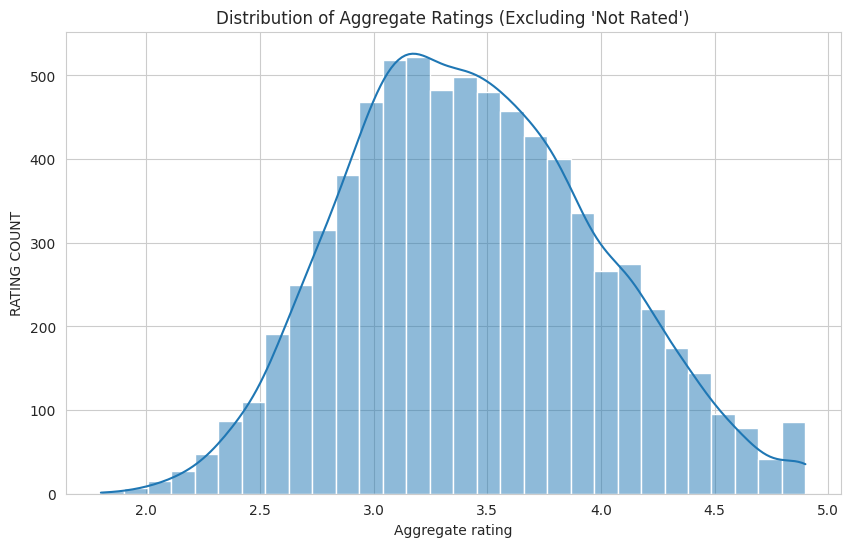

In [4]:
# --- Task 4: Analyze the distribution of 'Aggregate rating' ---

print("--- 'Aggregate rating' Summary (Before) ---")
# describe() gives you stats like mean, min, max
print(df['Aggregate rating'].describe())

# Count how many 0.0 ratings there are
rating_zeros = (df['Aggregate rating'] == 0).sum()
print(f"\nFound {rating_zeros} 'Not Rated' (0.0) entries.")

# Replace 0.0 with 'Not a Number' (np.nan) to treat them as missing
# This is vital so '0' doesn't skew your average rating
df['Aggregate rating'] = df['Aggregate rating'].replace(0.0, np.nan)

print("\n--- 'Aggregate rating' Summary (After removing 0s) ---")
# This summary now only shows stats for *actual* ratings
print(df['Aggregate rating'].describe())

# --- Plot the distribution ---
print("\nGenerating rating distribution plot...")
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Use .dropna() to plot only the non-missing ratings
# kde=True adds the smooth line over the bars
sns.histplot(df['Aggregate rating'].dropna(), bins=30, kde=True)

plt.title("Distribution of Aggregate Ratings (Excluding 'Not Rated')")
plt.xlabel("Aggregate rating")
plt.ylabel("RATING COUNT")

# This will display the plot right in your Colab cell
plt.show()

##**Save Cleaned DataFrame**

In [5]:
# Save the cleaned DataFrame to a new CSV file
cleaned_file_name = "cleaned_restaurant_dataset.csv"
df.to_csv(cleaned_file_name, index=False)

print(f"Cleaned DataFrame saved as '{cleaned_file_name}'")

Cleaned DataFrame saved as 'cleaned_restaurant_dataset.csv'


##**Download Files**

In [6]:
from google.colab import files

# Download the cleaned CSV file
print(f"Downloading '{cleaned_file_name}'...")
files.download(cleaned_file_name)

# Download the plot image
plot_file = "rating_distribution.png"
print(f"\nDownloading '{plot_file}'...")
files.download(plot_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: Cannot find file: rating_distribution.png